<a href="https://colab.research.google.com/github/Mir-Safwan-Marzouq/Deep-Learning/blob/main/9_GPU%20BenchMark/GPU_Bench_Marking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [10]:
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cat: /usr/local/cuda/include/cudnn.h: No such file or directory


In [9]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Feb__7_19:32:13_PST_2023
Cuda compilation tools, release 12.1, V12.1.66
Build cuda_12.1.r12.1/compiler.32415258_0


In [5]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-ubuntu2004.pin
!mv cuda-ubuntu2004.pin /etc/apt/preferences.d/cuda-repository-pin-600
!wget https://developer.download.nvidia.com/compute/cuda/11.4.1/local_installers/cuda-repo-ubuntu2004-11-4-local_11.4.1-470.57.02-1_amd64.deb
!dpkg -i cuda-repo-ubuntu2004-11-4-local_11.4.1-470.57.02-1_amd64.deb
!apt-key add /var/cuda-repo-ubuntu2004-11-4-local/7fa2af80.pub
!apt-get update
!apt-get -y install cuda


--2023-04-09 13:16:10--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-ubuntu2004.pin
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.199.20.126
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.20.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [application/octet-stream]
Saving to: ‘cuda-ubuntu2004.pin’

cuda-ubuntu2004.pin 100%[===================>]     190  --.-KB/s    in 0s      

2023-04-09 13:16:10 (4.98 MB/s) - ‘cuda-ubuntu2004.pin’ saved [190/190]

--2023-04-09 13:16:10--  https://developer.download.nvidia.com/compute/cuda/11.4.1/local_installers/cuda-repo-ubuntu2004-11-4-local_11.4.1-470.57.02-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.199.20.126
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.20.126|:443... connected.
HTTP request sent, awaiting response... 200 O

In [6]:
!dpkg -l | grep nvinfer

In [7]:
!echo "deb https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64 /" >> /etc/apt/sources.list.d/nvidia-ml.list
!apt-get update
!apt-get install -y --no-install-recommends libnvinfer8 libnvinfer-dev libnvinfer-plugin8
!pip install tensorrt

Get:1 file:/var/cuda-repo-ubuntu2004-11-4-local  InRelease
Ign:1 file:/var/cuda-repo-ubuntu2004-11-4-local  InRelease
Get:2 file:/var/cuda-repo-ubuntu2004-11-4-local  Release [564 B]
Get:2 file:/var/cuda-repo-ubuntu2004-11-4-local  Release [564 B]
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Hit:14 https://cloud.r-project.org/bin/linux/ubuntu foc

In [8]:
!dpkg -l | grep nvinfer

ii  libnvinfer-dev                         8.6.0.12-1+cuda12.0               amd64        TensorRT development libraries
ii  libnvinfer-headers-dev                 8.6.0.12-1+cuda12.0               amd64        TensorRT development headers
ii  libnvinfer-plugin8                     8.6.0.12-1+cuda12.0               amd64        TensorRT plugin libraries
ii  libnvinfer8                            8.6.0.12-1+cuda12.0               amd64        TensorRT runtime libraries


In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import tensorflow as tf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo cp /content/drive/MyDrive/cudnn-linux-x86_64-8.8.1.3_cuda12-archive/lib/libcudnn* /usr/local/cuda/lib64/
!sudo chmod a+r /usr/local/cuda/lib64/libcudnn*



In [4]:
import tensorflow as tf

# check TensorFlow version
print("TensorFlow version:", tf.__version__)

# create a simple TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape input data to have shape (batch_size, num_features)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# evaluate the model
model.evaluate(x_test, y_test, verbose=2)


TensorFlow version: 2.12.0
Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.3028 - accuracy: 0.9141 - val_loss: 0.1682 - val_accuracy: 0.9506
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1453 - accuracy: 0.9579 - val_loss: 0.1251 - val_accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1032 - accuracy: 0.9705 - val_loss: 0.1033 - val_accuracy: 0.9687
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0798 - accuracy: 0.9759 - val_loss: 0.0983 - val_accuracy: 0.9715
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0654 - accuracy: 0.9804 - val_loss: 0.0859 - val_accuracy: 0.9750
313/313 - 1s - loss: 0.0859 - accuracy: 0.9750 - 574ms/epoch - 2ms/step


[0.08592672646045685, 0.9750000238418579]

In [8]:
import tensorflow as tf

# Check if GPU is available
print("GPU available: ", tf.config.list_physical_devices('GPU'))

# Check if cuDNN is enabled
print("cuDNN enabled:", tf.config.list_physical_devices('GPU') and tf.test.is_built_with_cuda())


GPU available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
cuDNN enabled: True


In [10]:
tf.test.is_built_with_cuda()

True

Keras CIFAR-10 Dataset

In [11]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [12]:
X_train.shape

(50000, 32, 32, 3)

In [14]:
X_train[0].shape

(32, 32, 3)

In [15]:
y_train.shape

(50000, 1)

In [16]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [19]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

def plot_sample(index):
  plt.figure(figsize = (10,1))
  plt.imshow(X_train[index])

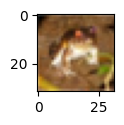

In [20]:
plot_sample(0)

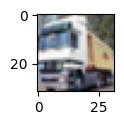

In [21]:
plot_sample(1)

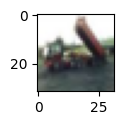

In [22]:
plot_sample(2)

In [23]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog","frog","horse", "ship","truck"]

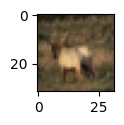

In [24]:
plot_sample(3)

In [25]:
y_train[3]

array([4], dtype=uint8)

In [26]:
classes[y_train[3][0]]

'deer'

Now Scaling the images

In [28]:
# when you scale the images your model tends to perform better
# X_train = X_train/255
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [29]:
X_train_scaled.shape # shape is same but values in range 0 to 1

(50000, 32, 32, 3)

In [30]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

One Hot Encoding for y_train

In [31]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

In [32]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

Model Building

In [35]:
#input
X_train.shape

(50000, 32, 32, 3)

In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)), #input layer
    #hidden layer
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'), #relu for hidden layer
    #output layer will have 10 neurons as I will have 10 classes and need to use sigmoid actiavation function
    #if you don't mention this it will go linear, won't use any activation function
    keras.layers.Dense(10, activation='sigmoid')
])


model.compile(optimizer='SGD',  #Stochastic Gradient Descent
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [41]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
# y_train has discrete value, if I used y_train then loss would be sparse categorical entropy might be used 
# but I am using y_train_categorical (one hot entropy), I would use categorical entropy 

In [47]:
model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8107 - accuracy: 0.3554
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6196 - accuracy: 0.4291
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5391 - accuracy: 0.4579
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4795 - accuracy: 0.4781
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4283 - accuracy: 0.4977
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3893 - accuracy: 0.5129
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3491 - accuracy: 0.5262
Epoch 8/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3151 - accuracy: 0.5380
Epoch 9/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2822 - accuracy: 0.5515
Epoch 10/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.253

In [49]:
model.predict(X_test_scaled)[0]

313/313 [==============================] - 1s 2ms/step


array([4.0821549e-01, 6.4094961e-01, 8.9584589e-01, 9.9909127e-01,
       9.9055231e-01, 8.0650264e-01, 9.4258292e-03, 1.2480478e-04,
       6.5606600e-01, 1.1064561e-01], dtype=float32)

In [50]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 0s 2ms/step


3

In [53]:
classes[y_test[0][0]]

'cat'

In [56]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 1s 4ms/step


'cat'

In [57]:
y_test[0][0]

3

another prediction

In [58]:
classes[y_test[1][0]]

'ship'

In [59]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 [==============================] - 1s 2ms/step


'ship'

In [60]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.5284 - accuracy: 0.5684


[1.5284337997436523, 0.5684000253677368]

performance test

In [61]:
def get_model():
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)), #input layer
    #hidden layer
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'), #relu for hidden layer
    #output layer will have 10 neurons as I will have 10 classes and need to use sigmoid actiavation function
    #if you don't mention this it will go linear, won't use any activation function
    keras.layers.Dense(10, activation='sigmoid')
  ])


  model.compile(optimizer='SGD',  #Stochastic Gradient Descent
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [64]:
%timeit -r1 -n1

with tf.device('/CPU:0'):
  cpu_model = get_model()
  cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 125s 80ms/step - loss: 1.8106 - accuracy: 0.3551


In [66]:
%timeit -r1 -n1

with tf.device('/GPU:0'):
  cpu_model = get_model()
  cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 7s 4ms/step - loss: 1.8093 - accuracy: 0.3580
